> Daniel Alvarez

In [132]:
from IPython import get_ipython
get_ipython().magic('reset -sf')

C:\Users\User\AppData\Local\Temp\ipykernel_10568\3700766821.py:2: DeprecationWarning: `magic(...)` is deprecated since IPython 0.13 (warning added in 8.1), use run_line_magic(magic_name, parameter_s).
  get_ipython().magic('reset -sf')


- Importacion de librerias

In [133]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import spearmanr
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn import svm
from sklearn.model_selection import KFold
from sklearn.neural_network import MLPRegressor
import cv2
from PIL import Image
plt.style.use('ggplot')

- Lectura de los archivos csv

In [134]:
# se define un dataframe para el vino rojo
df_data = pd.read_csv(r'Data_BAQ.csv', sep = ';')
# se define un dataframe para el vino blanco 
# se muestran en pantalla
df_data

,Year week,TRM ($),SUs Referral,Regulars Referral,DFTs Referral,Total DFTs,DgD DFTs Contribution %,Reward ($),Reward (USD),Trips(Requi),...,Paid,Offline,PBD,Campaign cost (USD),Campaign DAC (USD),Weekly burn (Local),Weekly burn (USD),Weekly DAC (USD),Week,DFTs
0,202250,4799.0,13,NaN,2,45,0.04,300000,63,70,...,NaN,NaN,NaN,.1K,$ 21,$ 2.300.000,.5K,$ 240,202150,4.0
1,202249,4823.0,24,NaN,16,53,0.30,600000,124,60,...,NaN,NaN,NaN,.4K,$ 31,$ 2.000.000,.4K,$ 26,202149,7.0
2,202248,4796.0,15,NaN,8,38,0.21,700000,146,100,...,NaN,NaN,NaN,.6K,$ 73,$ 4.800.000,1.0K,$ 125,202148,1.0
3,202247,4891.0,19,NaN,12,47,0.26,800000,164,100,...,NaN,NaN,NaN,1.0K,$ 82,$ 3.000.000,.6K,$ 51,202147,5.0
4,202246,4937.0,23,NaN,10,50,0.20,800000,162,100,...,NaN,NaN,NaN,.3K,$ 32,$ 700.000,.1K,$ 14,202146,2.0
5,202245,4874.0,19,NaN,10,66,0.15,700000,144,90,...,NaN,NaN,NaN,.4K,$ 33,$ 2.600.000,.5K,$ 53,202145,5.0
6,202244,5012.0,18,NaN,10,40,0.25,700000,140,90,...,NaN,NaN,NaN,.4K,$ 47,$ 1.900.000,.4K,$ 38,202144,3.0
7,202243,4879.0,16,NaN,15,47,0.32,600000,123,80,...,NaN,NaN,NaN,.5K,$ 49,$ 3.000.000,.6K,$ 41,202143,5.0
8,202242,4846.0,12,NaN,10,53,0.19,600000,124,80,...,NaN,NaN,NaN,.4K,$ 46,$ 600.000,.1K,$ 12,202142,1.0
9,202241,4642.0,18,NaN,7,41,0.17,600000,129,80,...,NaN,NaN,NaN,.5K,$ 40,$ 2.100.000,.5K,$ 65,202141,3.0


- Definición de entradas/salidas

In [135]:
# se define las entradas del modelo como features
# reward - Requerimeintos -WR
features = df_data.iloc[:, [7, 9, 13]]
# se define las salidas del modelo como labels
labels = df_data.iloc[:,2]

In [16]:
# del features

In [136]:
su = labels.to_numpy() 
rew = features.iloc[:, 0]
rew = rew.to_numpy()
trips = features.iloc[:, 1]
trips = trips.to_numpy()
WR = features.iloc[:, 2]
WR = WR.to_numpy()
corr1, _ = spearmanr(su, rew)
corr2, _ = spearmanr(su, trips)
corr3, _ = spearmanr(su, WR)
print('Spearmans correlation of Su and rewards: %.3f' % corr1)
print('Spearmans correlation of Su and Trips: %.3f' % corr2)
print('Spearmans correlation of Su and WR: %.3f' % corr3)

Spearmans correlation of Su and rewards: 0.435
Spearmans correlation of Su and Trips: 0.087
Spearmans correlation of Su and WR: 0.274


In [69]:
# se creo un vector de entradas y salidas para el modulo de entrenamiento y el de testing con relacion 8/2
# respectivamente
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, train_size=0.8)

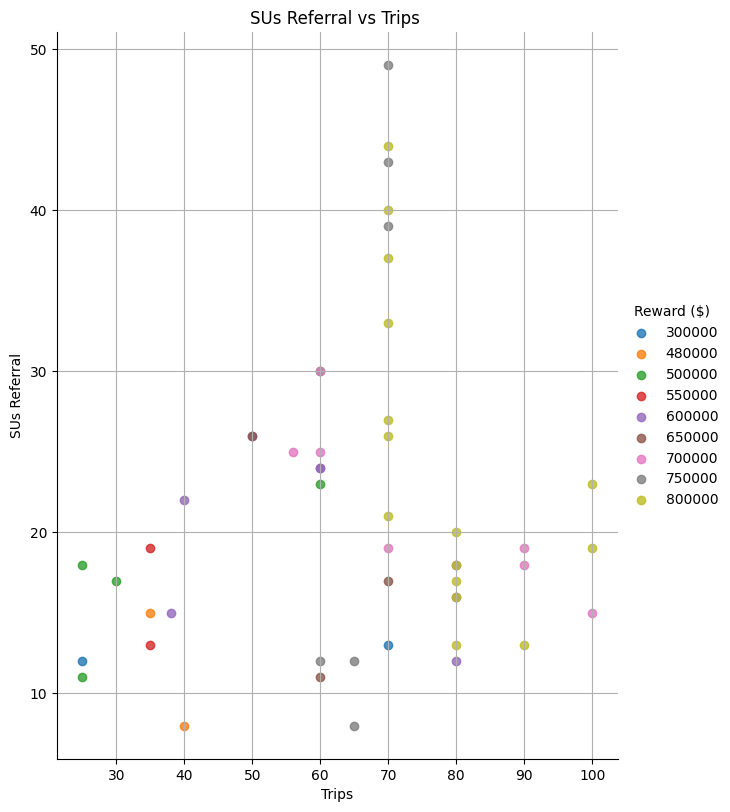

In [70]:
# 
# se toma como tercera variable la calidad
sns.lmplot(x='Trips(Requi)', 
           y='SUs Referral', 
           height=8,
           aspect=.8,
           data=df_data, 
           fit_reg=False, 
           hue='Reward ($)', 
           legend=True)

plt.xlabel("Trips")
plt.ylabel("SUs Referral")
plt.title("SUs Referral vs Trips ")
plt.grid()
plt.show()

In [33]:
'''
# ploteo de volatile acidity vs residual sugar
# se toma como tercera variable la calidad
sns.lmplot(x='volatile acidity', 
           y='residual sugar', 
           height=8,
           aspect=.8,
           data=result, 
           fit_reg=False, 
           hue='quality', 
           legend=True)

plt.xlabel("Volatile Acidity")
plt.ylabel("Residual Sugar")
plt.title("Residual Sugar vs Volatile Acidity")
plt.grid()
plt.show()
'''

'\n# ploteo de volatile acidity vs residual sugar\n# se toma como tercera variable la calidad\nsns.lmplot(x=\'volatile acidity\', \n           y=\'residual sugar\', \n           height=8,\n           aspect=.8,\n           data=result, \n           fit_reg=False, \n           hue=\'quality\', \n           legend=True)\n\nplt.xlabel("Volatile Acidity")\nplt.ylabel("Residual Sugar")\nplt.title("Residual Sugar vs Volatile Acidity")\nplt.grid()\nplt.show()\n'

- 2

In [71]:
# se creo un modelo para los tres solver diferentes
# con la misma función de activaion de tangente hiperbolica
# para este caso con 10 neuronas para 1 capa oculta
# con una parada de 1000 iteraciones

# ‘lbfgs’ is an optimizer in the family of quasi-Newton methods.
m1 = MLPRegressor(activation='tanh', hidden_layer_sizes=(10,), max_iter=1000, solver="lbfgs")
# ‘sgd’ refers to stochastic gradient descent.
m2 = MLPRegressor(activation='tanh', hidden_layer_sizes=(10,), max_iter=1000, solver="sgd")
# ‘adam’ refers to a stochastic gradient-based optimizer proposed by Kingma, Diederik, and Jimmy Ba
m3 = MLPRegressor(activation='tanh', hidden_layer_sizes=(10,), max_iter=1000, solver="adam")

In [72]:
# se realiza el encaje de cada modelo para los datos de entrenamiento 

# modelo 1

regr_1 = m1.fit(X_train, y_train)

# modelo 2

regr_2 = m2.fit(X_train, y_train)

# modelo 3

regr_3 = m3.fit(X_train, y_train)

c:\Users\User\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


Text(0, 0.5, 'Loss')

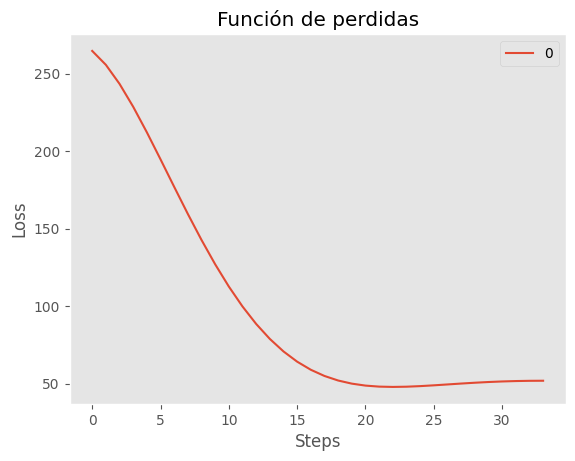

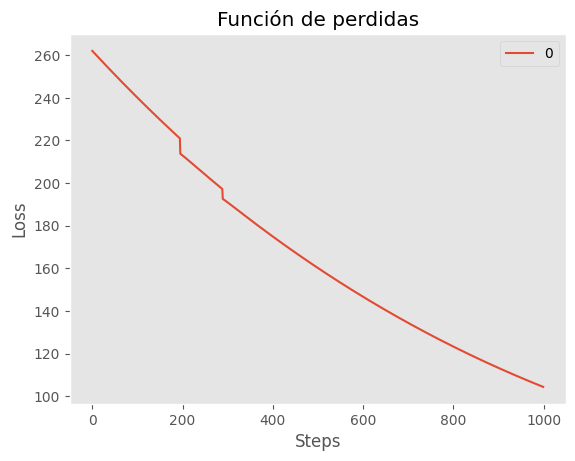

In [105]:
# se grafica la funcion de perdida para cada
# paso del algoritmo para el modelo 2
pd.DataFrame(m2.loss_curve_).plot()
plt.grid()
plt.title(r"Función de perdidas")
plt.xlabel("Steps")
plt.ylabel("Loss")
# se grafica la funcion de perdida para cada
# paso del algoritmo para el modelo 3
pd.DataFrame(m3.loss_curve_).plot()
plt.grid()
plt.title(r"Función de perdidas")
plt.xlabel("Steps")
plt.ylabel("Loss")

> Desde este punto podemos asegurar que el modelo no. 2 tiene menos perdida que el modelo no. 3

In [77]:
# R**2
# consta de la correlación de los puntos en función de la recta en este
# caso regresion que es detectada para esta
scores  = [regr_1.score(X_test, y_test), regr_2.score(X_test, y_test), regr_3.score(X_test, y_test)]
# regr_1.get_params()

> Se cumple la restricción que:
$$R^{2}_{m1}> R^{2}_{m3}>R^{2}_{m2}$$

Indicando que el modelo con la mejor correlación es el 1.

In [78]:
# se crea un escalador para realizar post-procesado
sc  = StandardScaler()
# se ajusta el escalador a los datos de entrenamiento del 
# modelo
scaler = sc.fit(X_train)
# se escalan los datos de entrenamiento
trainx_scaled = scaler.transform(X_train)
# se escalan los datos de test
testx_scaled = scaler.transform(X_test)

In [79]:
# se realiza una predicción para los tres modelos

# m1
y_pred1 = regr_1.predict(testx_scaled)
# m2
y_pred2 = regr_2.predict(testx_scaled)
# m3
y_pred3 = regr_3.predict(testx_scaled)

c:\Users\User\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
c:\Users\User\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
c:\Users\User\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


In [80]:
# Se obtiene la tabla de los datos
# "teoricos" y los predichos para cada modelo
df_temp = pd.DataFrame({'Actual': y_test, 'Predicted_m1': y_pred1, 'Predicted_m2':y_pred2, 'Predicted_m3':y_pred3})
# se grafican
df_temp.head()

,Actual,Predicted_m1,Predicted_m2,Predicted_m3
9,18,-1.357045,-5.460259,-0.681840
15,39,3.855781,2.638965,-0.508488
42,13,-5.190733,2.636895,-0.576984
43,19,-3.783815,6.096285,-0.483000
39,12,3.595121,6.402093,-0.449996


In [81]:
# para el primero se obtiene la media de la diferencia
# del valor real con el obtenido (tomando el absoluto).
# para el segundo se todo la suma cuadratica de los errores
# para el tercero se tomo la raiz del anterior 

# modelo 1
MAE1 = metrics.mean_absolute_error(y_test, y_pred1)  
MSE1 = metrics.mean_squared_error(y_test, y_pred1)  
RMS1 = np.sqrt(metrics.mean_squared_error(y_test, y_pred1))
R2_1 = RMS1/MSE1
# modelo 2
MAE2 = metrics.mean_absolute_error(y_test, y_pred2)  
MSE2 = metrics.mean_squared_error(y_test, y_pred2)  
RMS2 = np.sqrt(metrics.mean_squared_error(y_test, y_pred2))
R2_2 = RMS2/MSE2
# modelo 3
MAE3 = metrics.mean_absolute_error(y_test, y_pred3)  
MSE3 = metrics.mean_squared_error(y_test, y_pred3)  
RMS3 = np.sqrt(metrics.mean_squared_error(y_test, y_pred3))
R2_3 = RMS3/MSE3

In [82]:
# se crea un objeto de evaluacion/validacion cruzada para 5-fold
# se toma la validacion para los tres modelos 
kf = KFold(n_splits=5)
# modelo 1
scores1 = cross_val_score(m1, X_train, y_train, cv=kf)
# modelo 2
scores2 = cross_val_score(m2, X_train, y_train, cv=kf)
# modelo 3
scores3 = cross_val_score(m3, X_train, y_train, cv=kf)

c:\Users\User\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\User\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\User\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\User\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimiza

In [83]:
print("Metricas cross_validation 1", scores1)
print("Metricas cross_validation 2", scores2)
print("Metricas cross_validation 3", scores3)
print("Media de cross_validation 1", scores1.mean())
print("Media de cross_validation 2", scores2.mean())
print("Media de cross_validation 3", scores3.mean())

Metricas cross_validation 1 [-0.02406301 -0.08558831 -0.02359311 -0.07656908 -0.00723154]
Metricas cross_validation 2 [-9.00676163e-03 -7.54312897e-05 -1.35060906e-01 -5.81163378e-01
 -1.97018740e-01]
Metricas cross_validation 3 [-1.28911736 -2.13866428 -0.55881918 -2.35278026 -1.59908555]
Media de cross_validation 1 -0.04340900722845524
Media de cross_validation 2 -0.18446504341737824
Media de cross_validation 3 -1.587693323921318


> La razon por la cual da diferente en cada iteración es porque el algoritmo toma k muestras dependiendo de los pliegues en este caso 5, para realizar la validacion cruzada de estas muestras, como la población puede pertenecer a diferentes zonas del algoritmo los datos cambian, sin embargo, tomando el promedio de esta prueba notaremos que tiene distribución gaussiana con media en la validación aproximadamente real y varianza cercana a su relación $R^{2}$

In [109]:
print(m1.intercepts_)
print(m1.coefs_)

[array([ 0.39415256, -0.33010607,  0.11127922,  0.27401305, -0.59080762,
        0.45033371, -0.21218272, -0.63467012, -0.08980533,  0.59344654]), array([1.35272369])]
[array([[ 0.66964043, -0.1147339 ,  0.41618111, -0.19802075, -0.13704509,
        -0.31425508,  0.48680488,  0.67571388,  0.28675728, -0.49553268],
       [ 0.51985178,  0.49209808,  0.33479926,  0.67634372,  0.44066408,
         0.61351256,  0.23160187,  0.24760447,  0.51594246, -0.59148465],
       [ 0.15538306, -0.59424417,  0.14959905,  0.45497527,  0.65421953,
        -0.05218426, -0.67510975,  0.43143622, -0.36328621, -0.30836342]]), array([[ 2.38094785],
       [-1.84399521],
       [ 2.55805299],
       [-1.27999691],
       [-2.30466761],
       [-1.64054153],
       [ 2.34464067],
       [ 2.10024297],
       [ 1.80175652],
       [-2.06742944]])]


In [121]:
expected_y  = y_test
predicted_y = m2.predict(X_test)

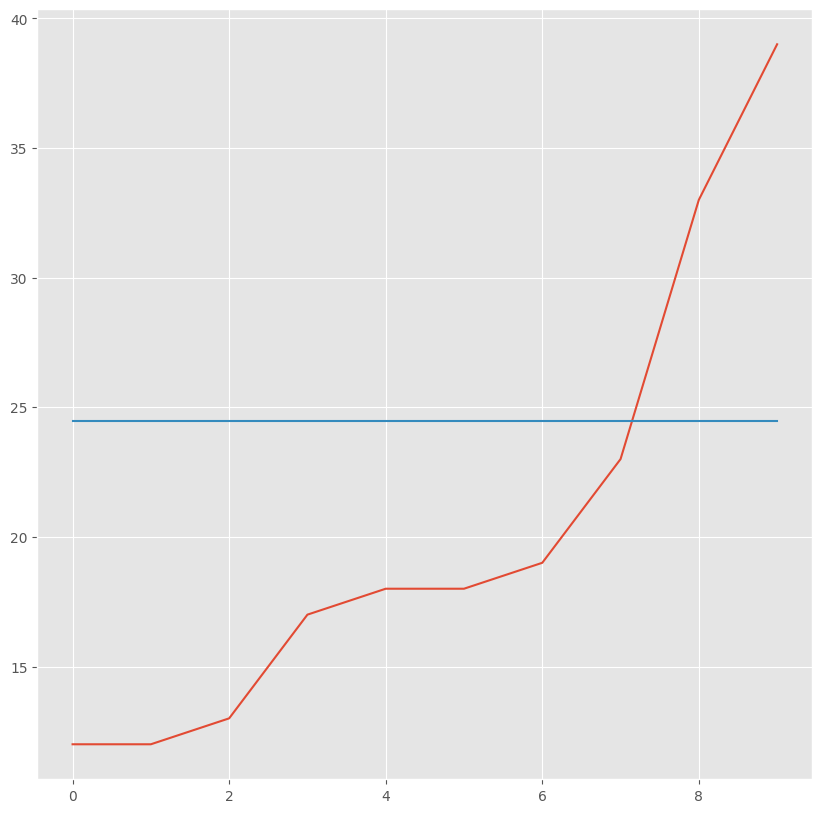

In [123]:
plt.figure(figsize=(10,10))
plt.plot(np.sort(expected_y))
plt.plot(np.sort(predicted_y))
plt.show()

In [11]:
def SUS(rewards, trips):
    return 0.0000947*rewards +  0.7505851*trips


Su = SUS(100000*2, 70)
Su
def SUS2(reward):
    return 0.0001821*reward

Su = SUS2(480000*2)
Su 

def BAQ1(reward): 
    return  0.0000317*reward
def BAQ2(reward, trips):
    return  0.0000362*reward - 0.0465545*trips
n = 1

u1 = BAQ1(50000*n) 
u2 = BAQ2(50000*n, 10)

print(u1, u2)

1.585 1.344455


In [17]:
def sis(reward):
    return 0.0000157*reward + 7.282719
sus = sis(50000*2)
sus

8.852719